# Stable states pattern of the model
## Asynchronous updating

We performed the stable states analysis using the asynchronous updating methods for the model pairs to identify all possible attractors including the cyclic attractors.     
To evaluate the consistency and robustness of the merged model, the attractors patterns of both the individual models and merged models are clustered based on the hamming distance between them.


In [1]:
model1name = "Bonzanni2013"
model2name = "Krumsiek2011"

In [2]:
# Need to install adjustText if using Colomoto
!pip install adjustText

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import pandas as pd
from rpy2.robjects.packages import importr
from rpy2.robjects import IntVector
from rpy2.robjects.vectors import ListVector
from rpy2 import robjects
from rpy2.robjects import conversion
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri
boolnet = importr("BoolNet")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches
import matplotlib.colors as colors
from scipy.stats import pearsonr
from adjustText import adjust_text

In [28]:
merged_and_name = "merged_and_" + model1name + "_" + model2name
merged_inhibitor_wins_name = "merged_inhibitor_wins_" + model1name + "_" + model2name
merged_or_name = "merged_or_" + model1name + "_" + model2name

# Function to save the asynchrnous attractor to a csv
def save_asyn_attr(network_name):
    net = boolnet.loadNetwork("Models/" + network_name + ".txt")
    attr = boolnet.getAttractors(net, type = 'asynchronous')
    
    # Activate the conversion context to use pandas DataFrame
    pandas2ri.activate()
    
    # Access the dataframe stored under the key '1'
    attrr = boolnet.plotAttractors(attr)
    r_df = attrr.rx2('1')
    
    # Use the local converter context to manage the conversion to a numpy array
    with localconverter(robjects.default_converter + pandas2ri.converter):
        np_array = np.array(r_df)
    
    # Extract names from the R dataframe
    row_names = list(r_df.rownames)
    column_names = list(r_df.colnames)
    
    df = pd.DataFrame(np_array, index=row_names, columns=column_names)
    
    # Save the simple attractors
    # df_simple = df.T
    # df_simple.index = df_simple.index.str.replace('Attr', 'S')
    # df_simple.to_csv('SimulationResults/attr_' + network_name + '_simple.csv')

    # Add the complex/loose attractors
    attrr_comp = boolnet.plotAttractors(attr ,mode = 'graph')
    for i in range(attrr.rx2('1').ncol,len(attrr_comp)):
        attr_array = attrr_comp[i][8][2][0]
        if len(attr_array[0]) == len(df):
            # Loop through each binary string in the array
            for idx, binary_str in enumerate(attr_array):
                # Convert each character in the string to an integer and add as a new column
                column_name = f'Attr{i+1}.{idx + 1}'
                df[column_name] = [int(char) for char in binary_str]
        else:
            print("The number of digits in the binary strings does not match the number of DataFrame rows.")
    df = df.T
    df.index = df.index.str.replace('Attr', 'S')
    save_path = 'SimulationResults/attr_' + network_name + '.csv'
    df.to_csv(save_path)
    print("Results saved at " + save_path)

# get the asynchronous attractor states of the individual models
save_asyn_attr(model1name)
save_asyn_attr(model2name)

# get the asynchronous attractor states of the merged models
save_asyn_attr(merged_and_name)
save_asyn_attr(merged_inhibitor_wins_name)
save_asyn_attr(merged_or_name)

Results saved at SimulationResults/attr_Bonzanni2013.csv
Results saved at SimulationResults/attr_Krumsiek2011.csv
Results saved at SimulationResults/attr_merged_and_Bonzanni2013_Krumsiek2011.csv
Results saved at SimulationResults/attr_merged_inhibitor_wins_Bonzanni2013_Krumsiek2011.csv
Results saved at SimulationResults/attr_merged_or_Bonzanni2013_Krumsiek2011.csv


In [38]:
# Define the order of columns for better visualization
column_order_1 = ['SMAD6','HHEX','RUNX1','CBFA2T3','ERG','GATA1','GATA2','ZFPM1', 'TAL1', 'SPI1', 'FLI1']
column_order_2 = ['GATA1', 'GATA2', 'ZFPM1', 'TAL1', 'SPI1', 'FLI1','KLF1','CEBPA','GFI1','NAB1','EGR2','JUN','EGR1']
column_order_merged = ['SMAD6','HHEX','RUNX1','CBFA2T3','ERG','GATA1','GATA2','ZFPM1', 'TAL1', 'SPI1', 'FLI1', 'KLF1','CEBPA','GFI1','NAB1','EGR2','JUN','EGR1']

# Model1 results
df1 = pd.read_csv("SimulationResults/attr_" + model1name + ".csv", index_col = 0)
df1.index = df1.index.str.replace('S', model1name[0]) #using 'A' for all stable states from the first model
df1 = df1[column_order_1]

# Model2 results
df2 = pd.read_csv("SimulationResults/attr_" + model2name + ".csv", index_col = 0)
df2.index = df2.index.str.replace('S', model2name[0]) #using 'B' for all stable states from the second model
df2 = df2[column_order_2]

# Merged results
df_and = pd.read_csv("SimulationResults/attr_merged_and_" + model1name + "_" + model2name + '.csv', index_col = 0)
df_and.index = df_and.index.str.replace('S', 'M') #using 'M' for all stable states from the merged model
df_and = df_and[column_order_merged]
df_and = pd.concat([df_and, df1, df2])

df_inhibitor_wins = pd.read_csv("SimulationResults/attr_merged_inhibitor_wins_" + model1name + "_" + model2name + '.csv', index_col = 0)
df_inhibitor_wins.index = df_inhibitor_wins.index.str.replace('S', 'M')
df_inhibitor_wins = df_inhibitor_wins[column_order_merged]
df_inhibitor_wins = pd.concat([df_inhibitor_wins, df1, df2])

df_or = pd.read_csv("SimulationResults/attr_merged_or_" + model1name + "_" + model2name + '.csv', index_col = 0)
df_or.index = df_or.index.str.replace('S', 'M')
df_or = df_or[column_order_merged]
df_or = pd.concat([df_or, df1, df2])

In [39]:
# If the genes are from mouse:
# Capitalize first letter only in column names
df1.columns = [col.capitalize() for col in df1.columns]
df2.columns = [col.capitalize() for col in df2.columns]
df_and.columns = [col.capitalize() for col in df_and.columns]
df_inhibitor_wins.columns = [col.capitalize() for col in df_inhibitor_wins.columns]
df_or.columns = [col.capitalize() for col in df_or.columns]

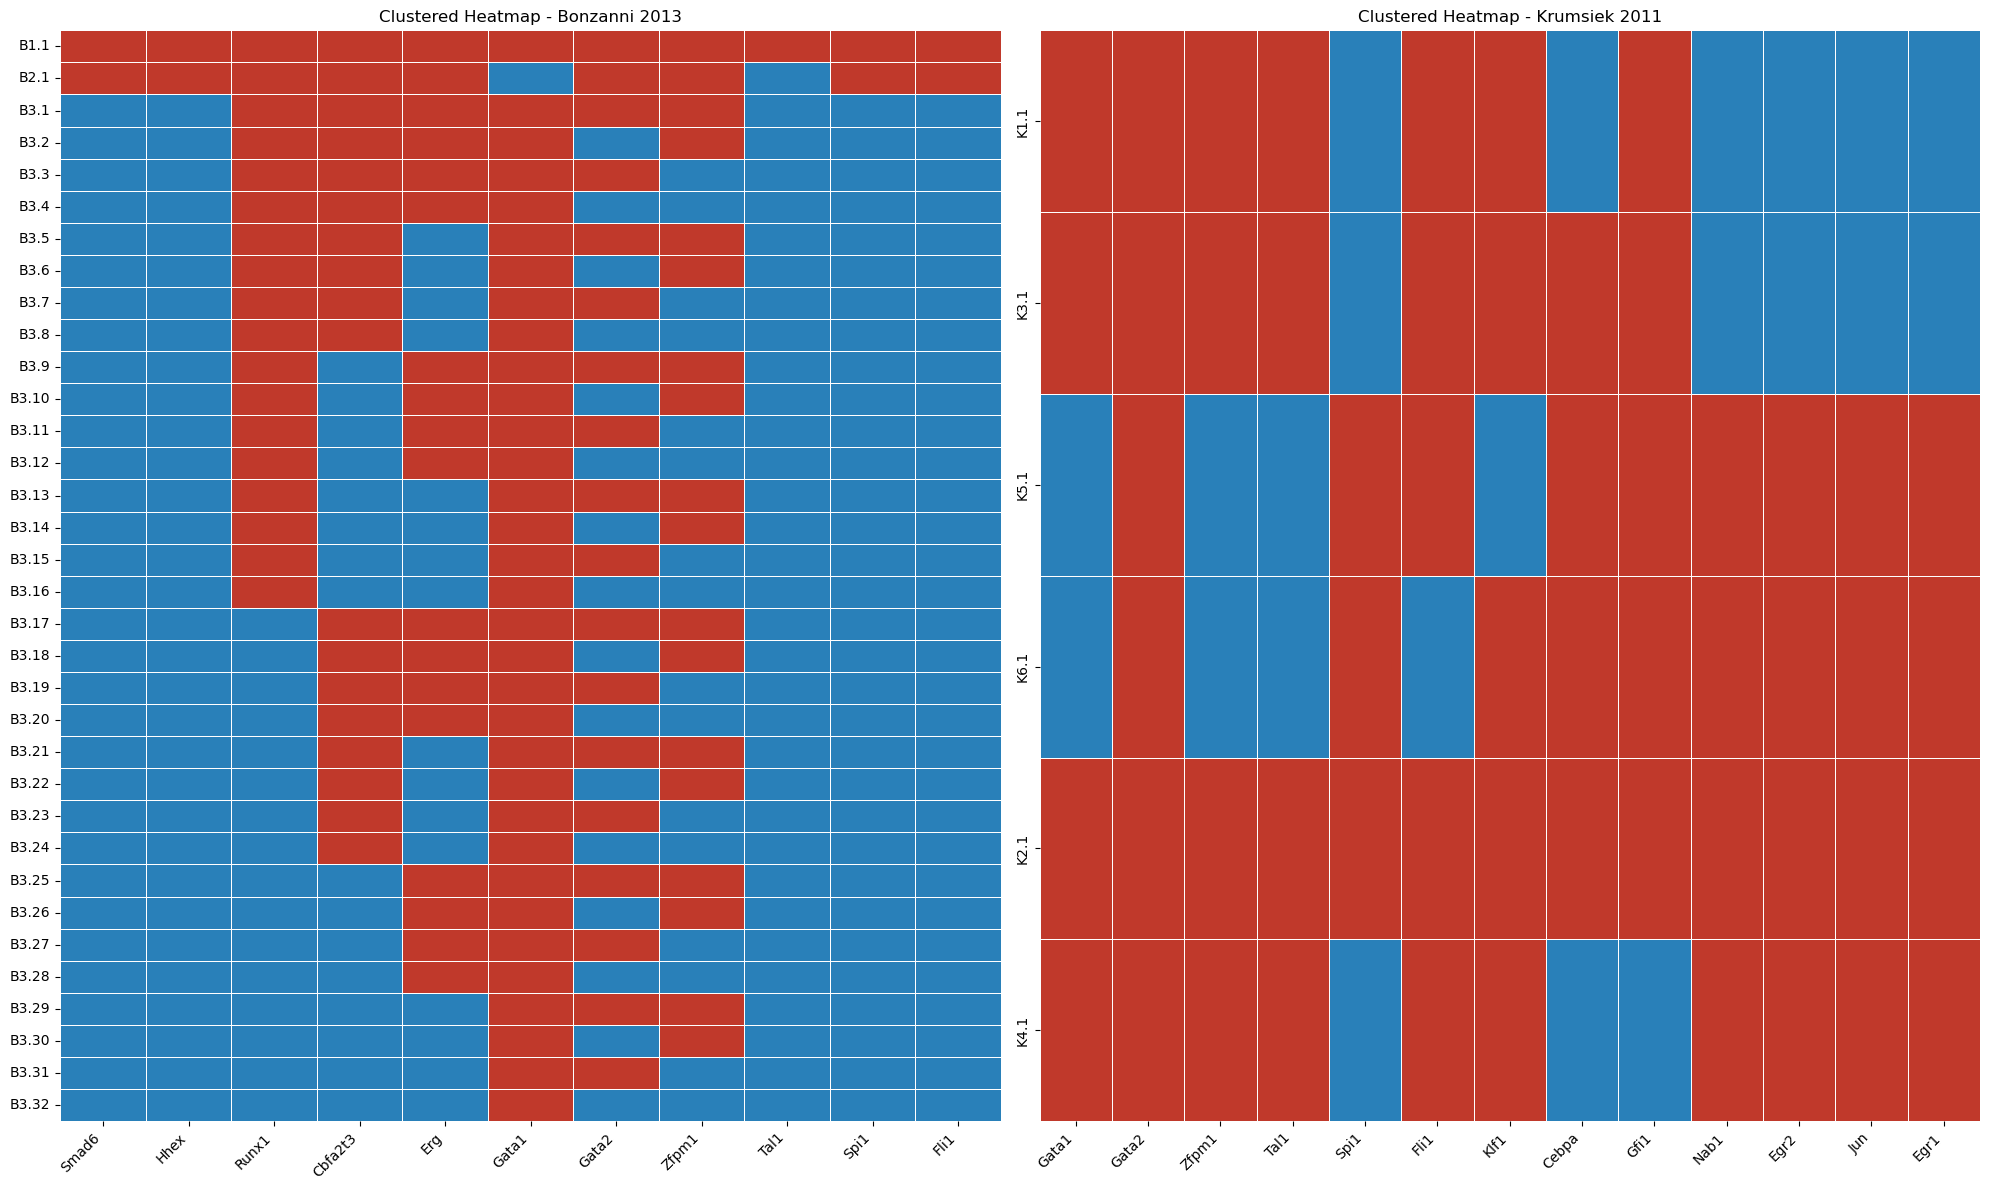

In [40]:
# Visualize
cmap = ListedColormap(['#c0392b', '#2980b9'])

g1 = sns.clustermap(df1, method='ward', metric='euclidean', cmap=cmap, linewidths=0.5, linecolor='white', figsize=(8, 8), cbar=False, col_cluster=False)
plt.close(g1.fig)  
g2 = sns.clustermap(df2, method='ward', metric='euclidean', cmap=cmap, linewidths=0.5, linecolor='white', figsize=(8, 8), cbar=False, col_cluster=False)
plt.close(g2.fig) 

# Create a new figure to hold both clustermaps
fig = plt.figure(figsize=(20,12))
gs = GridSpec(1, 2, figure=fig)

# Draw the first clustermap in the left subplot
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(g1.data2d, ax=ax1, cbar=False, cmap=cmap, linewidths=0.5, linecolor='white')
ax1.set_title('Clustered Heatmap - Bonzanni 2013')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

# Draw the second clustermap in the right subplot
ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(g2.data2d, ax=ax2, cbar=False, cmap=cmap, linewidths=0.5, linecolor='white')
ax2.set_title('Clustered Heatmap - Krumsiek 2011')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the combined figure
plt.tight_layout()
plt.show()

/tmp/ipykernel_583/2098886703.py:56: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((col_pos, row_pos), 1, 1, fill=True, color='lightgrey', edgecolor='black', linewidth=0.5)


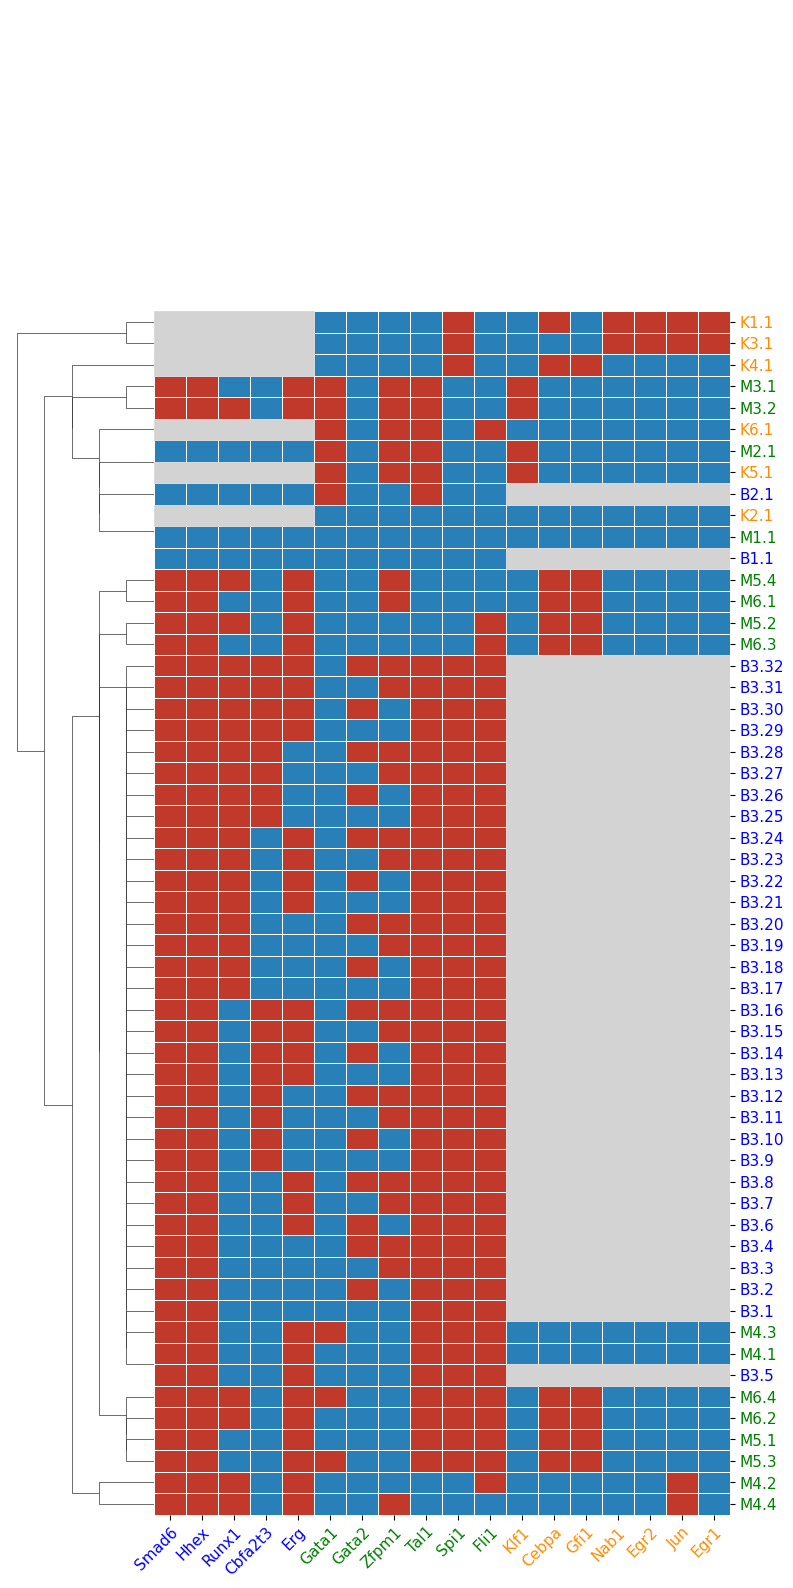

In [57]:
def heatmap(df, df_name, figsize=(8, 16), dpi = 300):
    # Create a custom colormap: blue for 0, red for 1
    cmap = ListedColormap(['#2980b9', '#c0392b'])
    bounds = [-0.1, 0.5, 1.1]  # Boundaries to separate colors
    norm = colors.BoundaryNorm(bounds, cmap.N)

    # Fill NaN values with 0 for clustering
    df_filled = df.fillna(0)
    
    # Mask NaN values for clustering
    mask = df.isna()

    # Create the clustermap
    g = sns.clustermap(df_filled, method='single', metric='hamming', cmap=cmap, norm=norm,
                       linewidths=0.5, linecolor='white', figsize=figsize, cbar=False, col_cluster=False)
    g.ax_heatmap.tick_params(axis='y', labelsize=11)
    g.ax_heatmap.tick_params(axis='x', labelsize=11)
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")  # Rotate x-tick labels
    g.cax.set_visible(False)

    # Determine the color based on the label text
    def get_ylabel_color(label):
        if label.startswith(model1name[0]):
            return 'blue'
        elif label.startswith(model2name[0]):
            return 'darkorange'
        elif label.startswith('M'):
            return 'green'
        else:
            return 'black'  # Default color
    
    def get_xlabel_color(label):
        if label.upper() in {x.upper() for x in column_order_merged} - {x.upper() for x in column_order_1}:
            return 'darkorange'
        elif label.upper() in {x.upper() for x in column_order_merged} - {x.upper() for x in column_order_2}:
            return 'blue'
        else:
            return 'green'
            
    # Set the color of labels based on their text
    for label in g.ax_heatmap.get_yticklabels():
        label.set_color(get_ylabel_color(label.get_text()))
    for label in g.ax_heatmap.get_xticklabels():
        label.set_color(get_xlabel_color(label.get_text()))

    # Add grey patches on NA grid cells based on clustered positions
    for (i, j), val in np.ndenumerate(df.values):
        if pd.isna(val):
            # Get the correct row and column indices in the clustered heatmap
            row_index = df.index[i]
            col_index = df.columns[j]
            # Find the positions in the clustered heatmap
            row_pos = np.where(g.data2d.index == row_index)[0][0]
            col_pos = np.where(g.data2d.columns == col_index)[0][0]
            # Create a rectangle patch with light grey fill
            rect = patches.Rectangle((col_pos, row_pos), 1, 1, fill=True, color='lightgrey', edgecolor='black', linewidth=0.5)
            g.ax_heatmap.add_patch(rect)
    
    # save the figure
    plt.savefig('SimulationResults/heatmap_' + df_name + '.png', dpi=dpi)
    plt.show()

heatmap(df_inhibitor_wins, merged_inhibitor_wins_name, dpi=300)

/tmp/ipykernel_583/2098886703.py:56: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((col_pos, row_pos), 1, 1, fill=True, color='lightgrey', edgecolor='black', linewidth=0.5)


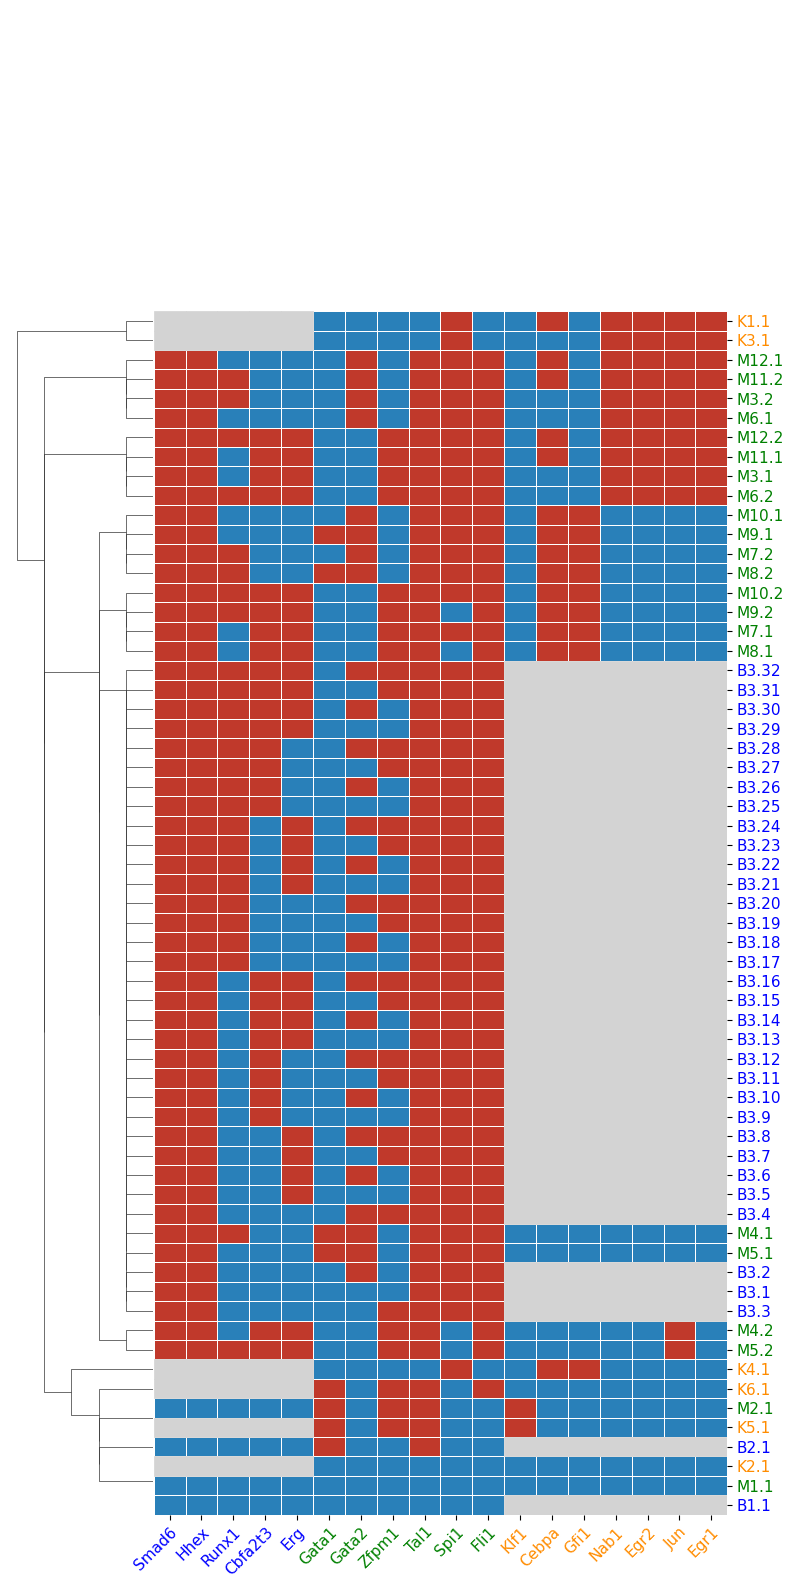

In [58]:
heatmap(df_or, merged_or_name, dpi=300)

/tmp/ipykernel_583/2098886703.py:56: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((col_pos, row_pos), 1, 1, fill=True, color='lightgrey', edgecolor='black', linewidth=0.5)


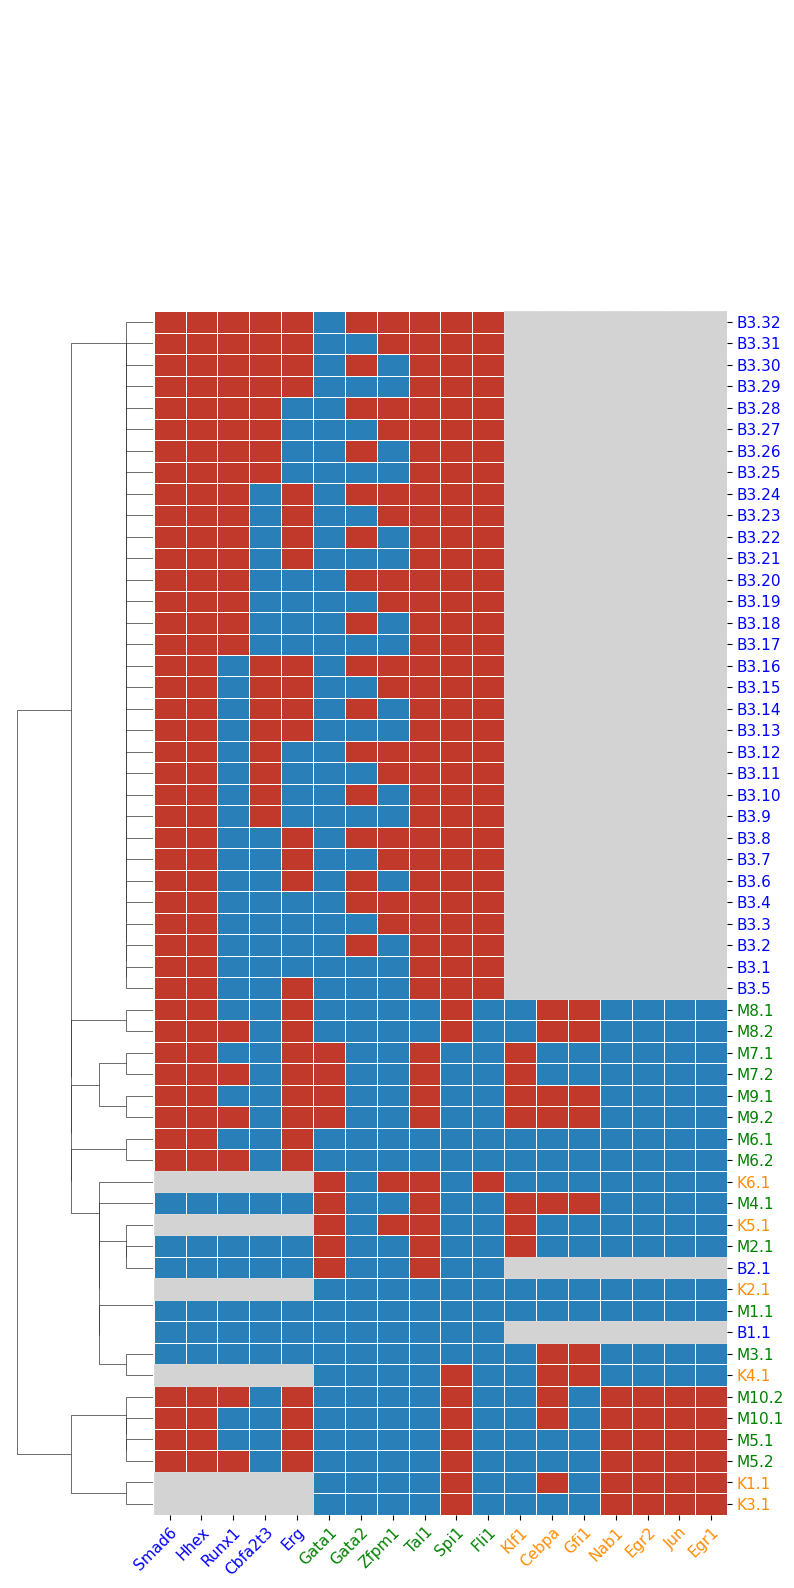

In [59]:
heatmap(df_and, merged_and_name, dpi=300)

## Cluster with cell expression data

In [46]:
# Load the CSV file 
df_csv = pd.read_csv('Data/Expression/Chambers2007.csv')
df_csv['Gene'] = df_csv['Gene'].str.upper()

# Group by Gene and calculate the mean for each gene to handle duplicates
df_csv_grouped = df_csv.groupby('Gene', as_index=False).mean()

dataframes = [df1, df2, df_or, df_and, df_inhibitor_wins]
merged_dataframes = {}

# Function to merge stable states with df_csv
def merge_with_csv(existing_df, csv_df, df_name):
    # If the genes are from mouse, capitalize the first letter
    csv_df['Gene'] = [col.capitalize() for col in csv_df['Gene']]
    # Filter the rows to only include genes that are present in the existing DataFrame columns
    filtered_csv = csv_df[csv_df['Gene'].isin(existing_df.columns)]

    transposed_df = existing_df.T
    transposed_df.reset_index(inplace=True)
    transposed_df.columns = ['Gene'] + list(transposed_df.columns[1:])
    merged_df = pd.merge(transposed_df, filtered_csv, on='Gene', how='inner')
    final_merged_df = merged_df.set_index('Gene').T
    merged_dataframes[df_name] = final_merged_df    
    return final_merged_df

# Merge each of the existing DataFrames with the CSV file
merge_with_csv(df1, df_csv_grouped, 'df1')
merge_with_csv(df2, df_csv_grouped, 'df2')
merge_with_csv(df_or, df_csv_grouped, 'df_or')
merge_with_csv(df_and, df_csv_grouped, 'df_and')
merge_with_csv(df_inhibitor_wins, df_csv_grouped, 'df_inhibitor_wins')

Gene,Smad6,Hhex,Runx1,Erg,Gata1,Gata2,Zfpm1,Tal1,Fli1,Klf1,Cebpa,Gfi1,Nab1,Egr2,Jun,Egr1
M1.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
M2.1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
M3.1,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
M3.2,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
M4.1,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T-CD8,0.113535,0.307360,0.184022,0.159255,0.166389,0.158502,0.245141,0.149389,0.489464,0.113835,0.118316,0.565269,0.322444,0.599465,0.419157,0.672212
Bcell,0.112102,0.730297,0.187252,0.154475,0.122511,0.159529,0.224506,0.148082,0.528792,0.112400,0.117157,0.433547,0.323371,0.612696,0.322031,0.672022
Monocyte,0.116309,0.715274,0.191599,0.184570,0.204421,0.165801,0.133548,0.298067,0.510357,0.116615,0.191828,0.337297,0.326069,0.591800,0.572448,0.732882
Granulocyte,0.115386,0.767543,0.189126,0.439377,0.244171,0.212321,0.202562,0.398631,0.520284,0.221470,0.165223,0.554088,0.347940,0.290295,0.339021,0.358301


/tmp/ipykernel_583/195963729.py:58: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((col_pos, row_pos), 1, 1, fill=True, color='lightgrey', edgecolor='black', linewidth=0.5)


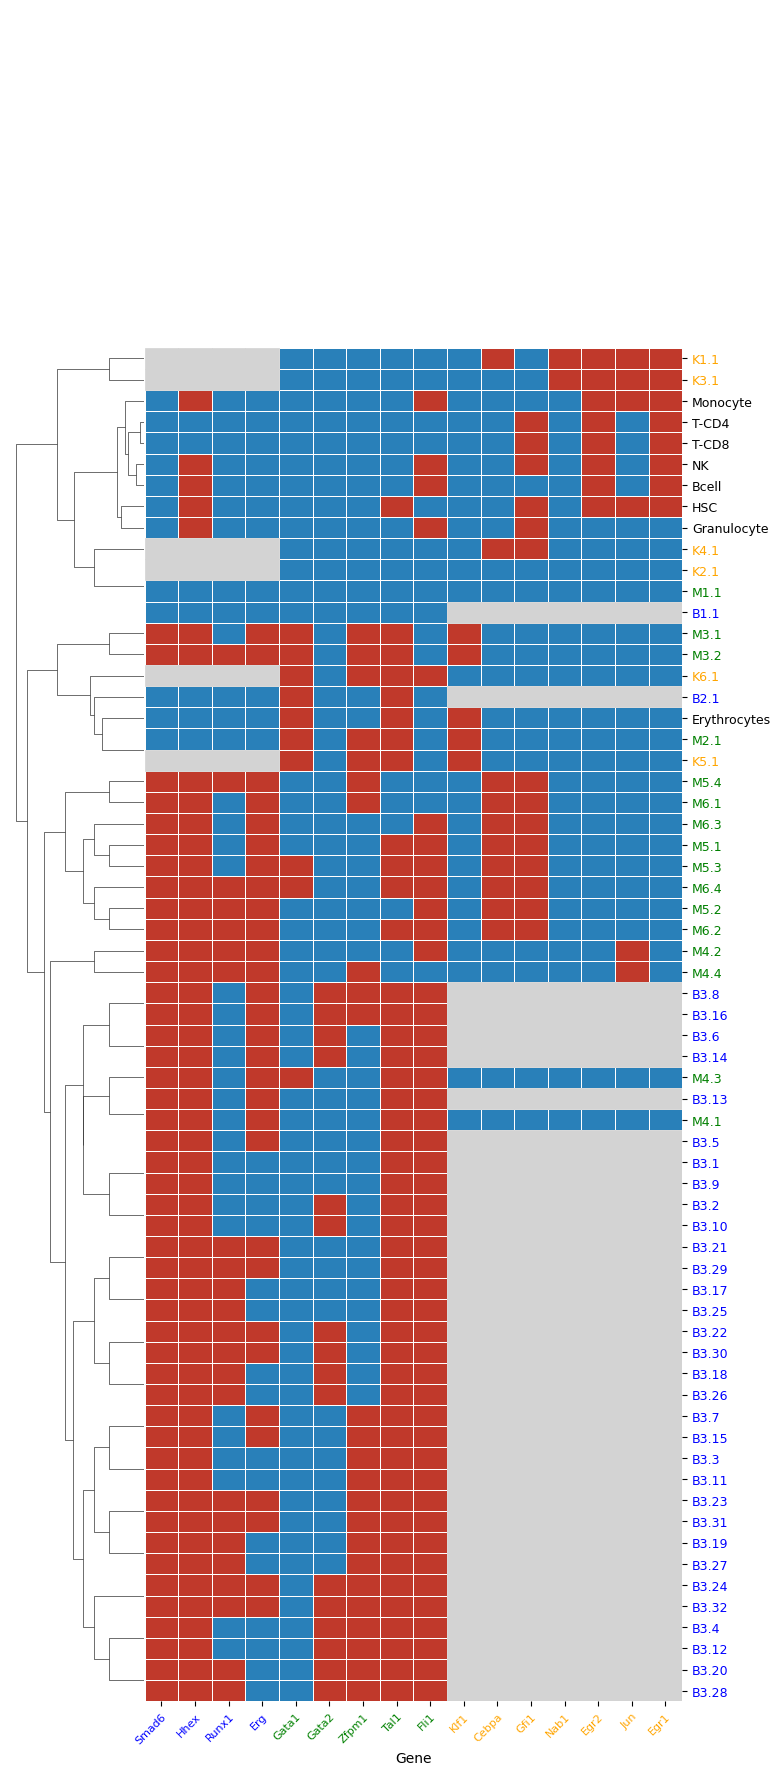

<Figure size 640x480 with 0 Axes>

In [60]:
def heatmap(df, df_name, figsize=(8, 18), dpi = 300):
    # Create a custom colormap: blue for 0, red for 1
    cmap = ListedColormap(['#2980b9', '#c0392b'])
    bounds = [-0.1, 0.5, 1.1]  # Boundaries to separate colors
    norm = colors.BoundaryNorm(bounds, cmap.N)

    # Fill NaN values with 0 for clustering
    df_filled = df.fillna(0)
    
    # Mask NaN values for clustering
    mask = df.isna()

    # Create the clustermap
    g = sns.clustermap(df_filled, method='complete', metric='euclidean', cmap=cmap, norm=norm,
                       linewidths=0.5, linecolor='white', figsize=figsize, cbar=False, col_cluster=False)
    g.ax_heatmap.tick_params(axis='y', labelsize=9)
    g.ax_heatmap.tick_params(axis='x', labelsize=8)
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")  # Rotate x-tick labels
    g.cax.set_visible(False)

    # Determine the color based on the label text
    def get_ylabel_color(label):
        if label in ['Bcell', 'Monocyte']:
            return 'black' 
        elif label.startswith(model1name[0]):
            return 'blue'
        elif label.startswith(model2name[0]):
            return 'orange'
        elif label.startswith('M'):
            return 'green'
        else:
            return 'black'  # Default color
    
    def get_xlabel_color(label):
        if label.upper() in {x.upper() for x in column_order_merged} - {x.upper() for x in column_order_1}:
            return 'orange'
        elif label.upper() in {x.upper() for x in column_order_merged} - {x.upper() for x in column_order_2}:
            return 'blue'
        else:
            return 'green'
            
    # Set the color of labels based on their text
    for label in g.ax_heatmap.get_yticklabels():
        label.set_color(get_ylabel_color(label.get_text()))
    for label in g.ax_heatmap.get_xticklabels():
        label.set_color(get_xlabel_color(label.get_text()))

    # Add grey patches on NA grid cells based on clustered positions
    for (i, j), val in np.ndenumerate(df.values):
        if pd.isna(val):
            # Get the correct row and column indices in the clustered heatmap
            row_index = df.index[i]
            col_index = df.columns[j]
            # Find the positions in the clustered heatmap
            row_pos = np.where(g.data2d.index == row_index)[0][0]
            col_pos = np.where(g.data2d.columns == col_index)[0][0]
            # Create a rectangle patch with light grey fill
            rect = patches.Rectangle((col_pos, row_pos), 1, 1, fill=True, color='lightgrey', edgecolor='black', linewidth=0.5)
            g.ax_heatmap.add_patch(rect)
    
    plt.show()
    # save the figure
    plt.savefig('SimulationResults/heatmap_' + df_name + '.png', dpi=dpi)

heatmap(merged_dataframes['df_inhibitor_wins'], merged_inhibitor_wins_name + '_expression', dpi=300)

/tmp/ipykernel_583/195963729.py:58: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((col_pos, row_pos), 1, 1, fill=True, color='lightgrey', edgecolor='black', linewidth=0.5)


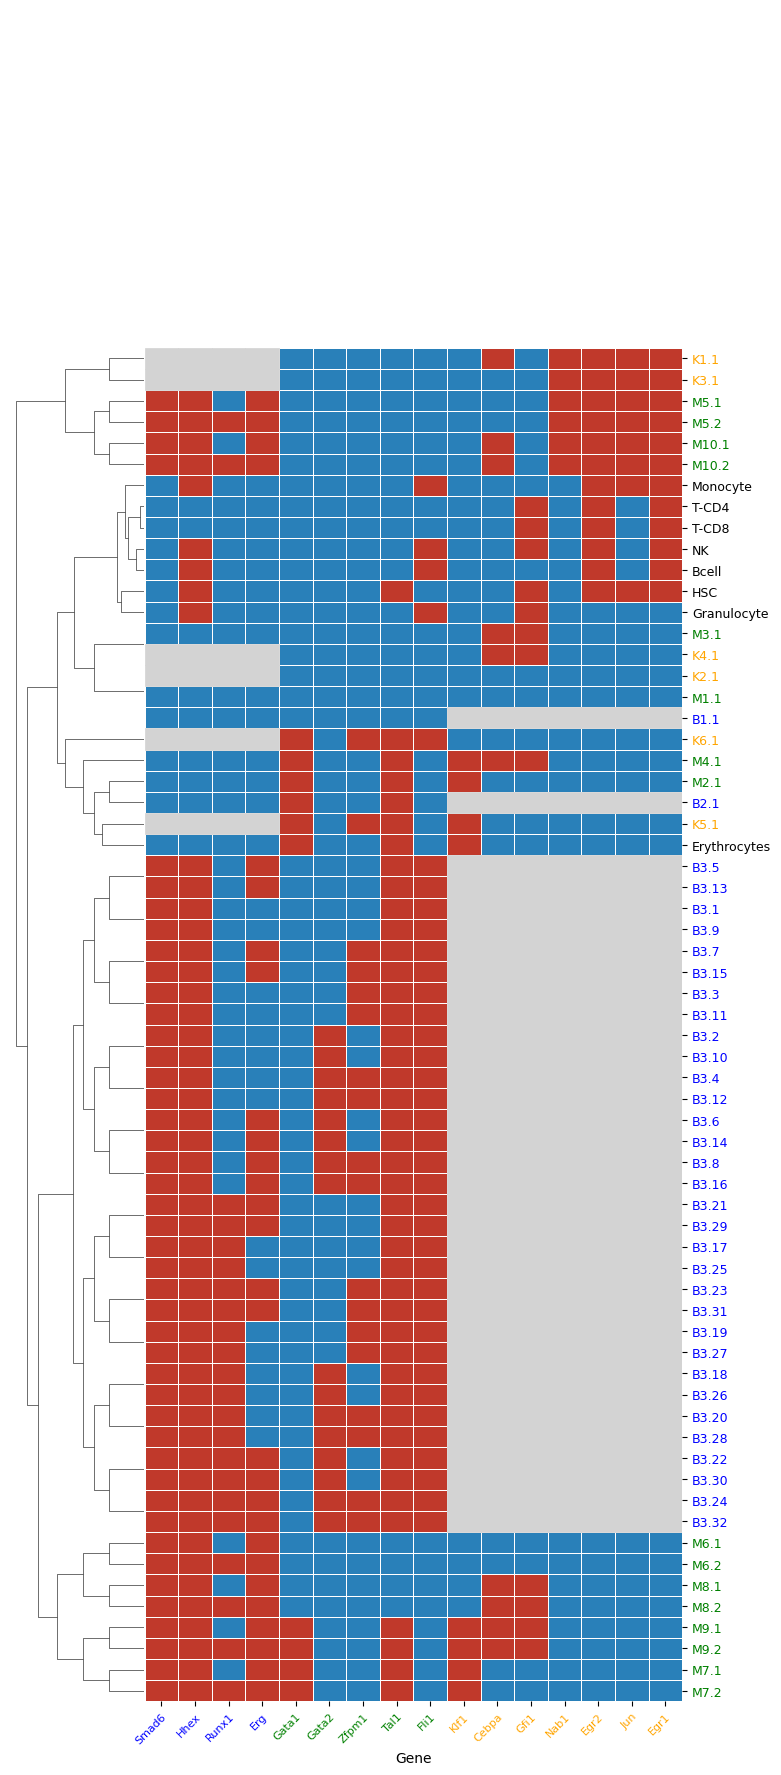

<Figure size 640x480 with 0 Axes>

In [61]:
heatmap(merged_dataframes['df_and'], merged_and_name + '_expression', dpi=300)

/tmp/ipykernel_583/195963729.py:58: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((col_pos, row_pos), 1, 1, fill=True, color='lightgrey', edgecolor='black', linewidth=0.5)


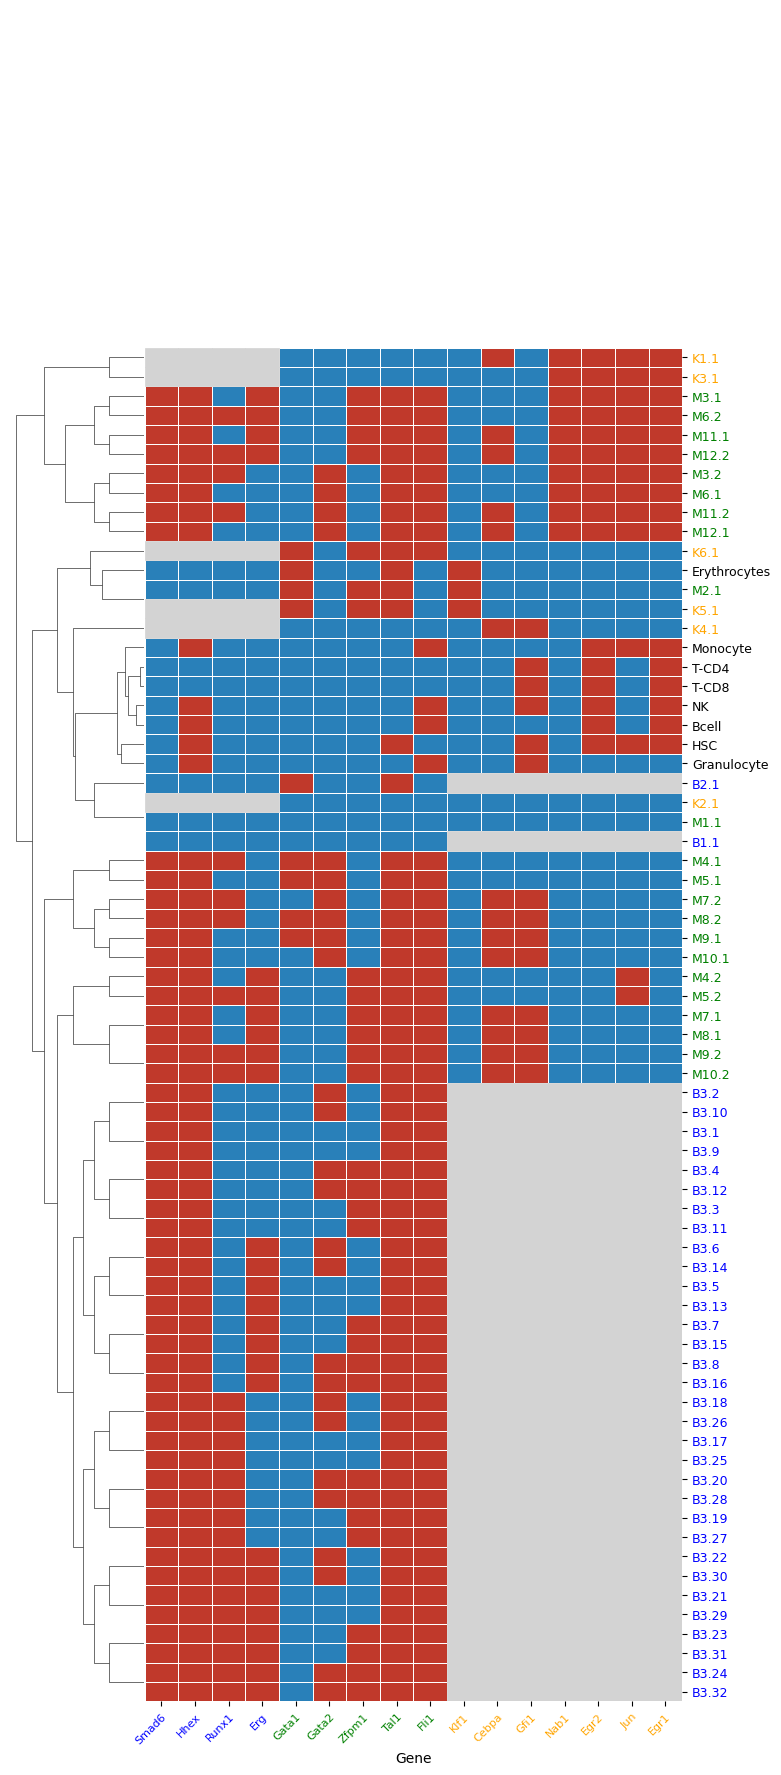

<Figure size 640x480 with 0 Axes>

In [62]:
heatmap(merged_dataframes['df_or'], merged_or_name + '_expression', dpi=300)